In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib
from matplotlib.colors import BoundaryNorm, ListedColormap

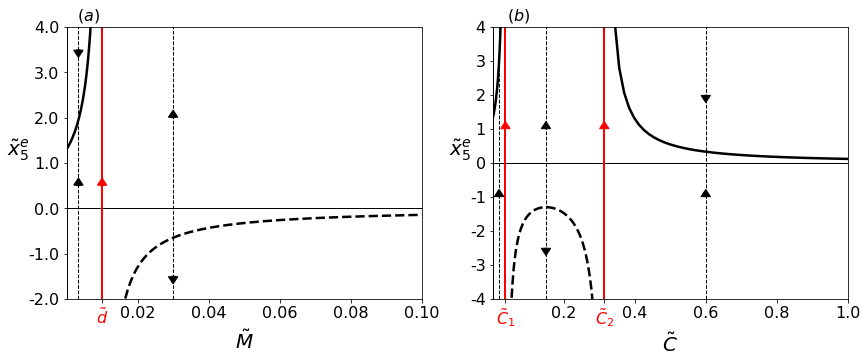

In [2]:
fig, axs = plt.subplots(1,2,figsize=(14,5))

def phi_51(D,a_51,c,D_opt5):
    
    return ( ( c**( (1) / (1+c) ) )*( np.exp( a_51*D_opt5 ) ) + ( c**( - (c) / (1+c) ) )*( np.exp( -c*a_51*D_opt5 ) ) ) \
        / ( ( c**( (1) / (1+c) ) )*( np.exp( -a_51*(D-D_opt5) ) ) + ( c**( - (c) / (1+c) ) )*( np.exp( c*a_51*(D-D_opt5) ) ) )

def x_5e(M,D,C,s,d,a_51,c,D_opt5,C_opt,C_r):
    
    return ( s * phi_51(D,a_51,c,D_opt5) ) / ( d - M*C*( (C_r - C) / ( C_opt**2 + C*(C_r-2*C_opt) ) ) )

C_opt = 0.15
C_r = 0.4

D = 0.5

s = d = 0.01
a_51 = 0.8206
c = 5.83
D_opt5 = 0.5

C = C_opt



M_neg = np.linspace(-0.3,d-0.0001,10000)
axs[0].plot(M_neg,x_5e(M_neg,D,C,s,d,a_51,c,D_opt5,C_opt,C_r),linewidth=2.5,color='k')
M_pos = np.linspace(d+0.0001,0.3,10000)
axs[0].plot(M_pos,x_5e(M_pos,D,C,s,d,a_51,c,D_opt5,C_opt,C_r),linewidth=2.5,color='k',linestyle='--')

axs[0].hlines(0,-0.3,0.3,linewidth=1,color='k')
axs[0].vlines(0,-2,4,linewidth=1,color='k')
axs[0].vlines(d,-2,4,linewidth=2,color='r')
axs[0].set_xlim(0,0.1)
axs[0].set_ylim(-2,4)

axs[0].set_xticks([d,0.02,0.04,0.06,0.08,0.1])
axs[0].set_xticklabels([r'$\tilde{d}$','0.02','0.04','0.06','0.08','0.10'],fontsize=16)
axs[0].get_xticklabels()[0].set_color('red')

axs[0].set_yticks([-2.0,-1.0,0,1.0,2.0,3.0,4.0])
axs[0].set_yticklabels(['-2.0','-1.0','0.0','1.0','2.0','3.0','4.0'],fontsize=16)

axs[0].set_xlabel(r'$\tilde{M}$',fontsize=20)
axs[0].set_ylabel(r'$\tilde{x}_5^e$',rotation=0,fontsize=20,labelpad=10)




def x_5e(C,D,s,d,a_51,c,D_opt5,C_opt,C_r,M):
    
    return ( s * phi_51(D,a_51,c,D_opt5) ) / ( d - M*C*( (C_r - C) / ( C_opt**2 + C*(C_r-2*C_opt) ) ) )

C_opt = 0.15
C_r = 0.4

D = 0.5

s = d = 0.01
a_51 = 0.8206
c = 5.83
D_opt5 = 0.5

M = 2*d

Cs = np.linspace(0,1,1000)

def c1(d,rho_5c,sigma_5c,a_52):

    return ( - ( (d-(rho_5c-sigma_5c*a_52)) / (sigma_5c) ) - np.sqrt( ( (d-(rho_5c-sigma_5c*a_52)) / (sigma_5c) )**2\
                                                              - ( (4*d*a_52) / (sigma_5c) ) ) ) / (2)
    
def c2(d,rho_5c,sigma_5c,a_52):

    return ( - ( (d-(rho_5c-sigma_5c*a_52)) / (sigma_5c) ) + np.sqrt( ( (d-(rho_5c-sigma_5c*a_52)) / (sigma_5c) )**2\
                                                              - ( (4*d*a_52) / (sigma_5c) ) ) ) / (2)

a_52 = ( ( C_opt )**2 / ( C_r - 2*C_opt ) )

sigma_5C = M / ( C_r - 2*C_opt )

rho_5C = M * ( (C_r - C_opt) / (C_r - 2*C_opt) )**2

c_1 = c1(d,rho_5C,sigma_5C,a_52)

c_2 = c2(d,rho_5C,sigma_5C,a_52)

Cs1 = np.linspace(0,c_1-0.0001,1000)
Cs2 = np.linspace(c_1+0.0001,c_2-0.0001,1000)
Cs3 = np.linspace(c_2+0.0001,1)

axs[1].plot(Cs1,x_5e(Cs1,D,s,d,a_51,c,D_opt5,C_opt,C_r,M),linewidth=2.5,color='k')
axs[1].plot(Cs2,x_5e(Cs2,D,s,d,a_51,c,D_opt5,C_opt,C_r,M),linewidth=2.5,color='k',linestyle='--')
axs[1].plot(Cs3,x_5e(Cs3,D,s,d,a_51,c,D_opt5,C_opt,C_r,M),linewidth=2.5,color='k')

axs[1].hlines(0,0,1,linewidth=1,color='k')
axs[1].vlines(0,-4,4,linewidth=1,color='k')
axs[1].vlines(c_1,-4,4,linewidth=2,color='r')
axs[1].vlines(c_2,-4,4,linewidth=2,color='r')
axs[1].set_xlim(0,1)
axs[1].set_ylim(-4,4)

axs[1].set_xticks([c_1,0.2,c_2,0.4,0.6,0.8,1.0])
axs[1].set_xticklabels([r'$\tilde{C}_1$','0.2',r'$\tilde{C}_2$','0.4','0.6','0.8','1.0'],fontsize=16)
axs[1].get_xticklabels()[0].set_color('red')
axs[1].get_xticklabels()[2].set_color('red')

axs[1].set_yticks([-4,-3,-2,-1,0,1,2,3,4])
axs[1].set_yticklabels(['-4','-3','-2','-1','0','1','2','3','4'],fontsize=16)

axs[1].set_xlabel(r'$\tilde{C}$',fontsize=20)
axs[1].set_ylabel(r'$\tilde{x}_5^e$',rotation=0,fontsize=20,labelpad=10)

axs[0].text(0.003,4.15,r'$(a)$',fontsize=16)
axs[1].text(0.04,4.2,r'$(b)$',fontsize=16)

axs[0].vlines(0.01/3,-2,4,'k',linestyle='--',linewidth=1)
axs[0].vlines(0.03,-2,4,'k',linestyle='--',linewidth=1)

axs[1].vlines(C_opt,-4,4,'k',linestyle='--',linewidth=1)
axs[1].vlines(0.6,-4,4,'k',linestyle='--',linewidth=1)
axs[1].vlines(c_1/2,-4,4,'k',linestyle='--',linewidth=1)

axs[0].arrow(0.03,2,0,0.01,head_length=0.2*0.8,head_width=.01/3*0.8,color='k')
axs[0].arrow(0.03,-1.5,0,-0.01,head_length=0.2*0.8,head_width=.01/3*0.8,color='k')

axs[0].arrow(0.01/3,3.5,0,-0.01,head_length=0.2*0.8,head_width=.01/3*0.8,color='k')
axs[0].arrow(0.01/3,0.5,0,0.01,head_length=0.2*0.8,head_width=.01/3*0.8,color='k')


axs[1].arrow(C_opt,1,0,0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='k')
axs[1].arrow(C_opt,-2.5,0,-0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='k')

axs[1].arrow(0.6,2,0,-0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='k')
axs[1].arrow(0.6,-1,0,0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='k')

axs[1].arrow(c_1/2,-1,0,0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='k')

axs[0].arrow(0.01,0.5,0,0.01,head_length=0.2*0.8,head_width=.01/3*0.8,color='r')

axs[1].arrow(c_1,1,0,0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='r')
axs[1].arrow(c_2,1,0,0.01,head_length=0.2*4/3*0.8,head_width=.01/3*10*0.8,color='r')